# Module import

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics # 모델평가시 이용

# 데이터 전처리

In [4]:
X = pd.read_csv('./5조데이터(4차통합).csv',encoding='CP949') ; X
X_ = X.copy() ; X

,날짜,요일,주문수,평균기온,최저기온,최고기온,강수량mm,구글검색량,네이버검색량,확진자,...,방학여부,도마1동인구,도마2동인구,변동인구,영업가게,유튜브조회수,전국확진자,전국완치자,전국사망자,코로나발발
0,2015-11-08,일,64,13.9,13.4,14.5,15.5,26.000000,NaN,0,...,0,17755.0,20916.0,18026.0,45,NaN,0,0,0,0
1,2015-11-09,월,31,13.1,11.5,15.2,1.7,27.428571,NaN,0,...,0,17753.0,20913.0,18025.0,45,NaN,0,0,0,0
2,2015-11-10,화,19,11.0,8.0,14.5,NaN,28.857143,NaN,0,...,0,17751.0,20910.0,18024.0,45,NaN,0,0,0,0
3,2015-11-11,수,28,11.9,6.8,18.3,NaN,30.285714,NaN,0,...,0,17749.0,20907.0,18023.0,45,NaN,0,0,0,0
4,2015-11-12,목,24,13.6,8.8,19.4,NaN,31.714286,NaN,0,...,0,17747.0,20904.0,18022.0,45,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2020-09-22,화,60,19.1,14.9,24.5,NaN,61.428571,13.00523,2,...,0,NaN,NaN,NaN,31,NaN,70,2,90,1
1693,2020-09-23,수,54,19.0,14.4,23.6,NaN,67.142857,13.21658,0,...,0,NaN,NaN,NaN,31,NaN,61,3,193,1
1694,2020-09-24,목,57,20.8,15.7,26.4,NaN,72.857143,13.80988,0,...,0,NaN,NaN,NaN,31,NaN,110,0,209,1
1695,2020-09-25,금,77,20.0,14.8,25.9,NaN,78.571429,17.88591,1,...,0,NaN,NaN,NaN,31,NaN,125,5,182,1


In [5]:
# 월변수 만들기
X['월'] =  X['날짜'].str[5:7]

# 월 , 요일 변수 one hot vector 로 바꾸기
X = pd.get_dummies(X, columns=['요일','월'],drop_first= False)

In [6]:
# y 변수 추출
y = np.array(X['주문수'])

In [5]:
# 필요없는 변수 dropping
X.drop(columns=['복날','날짜','주문수','최저기온',
                '최고기온','확진자','사망자','완치자','전국확진자','전국완치자','전국사망자','유튜브조회수','코로나발발'],inplace=True)

## Imputation

In [6]:
# 강수량 Imputation 
X['강수량mm'] = X['강수량mm'].fillna(0)
# 강수량 변환
X['강수량mm'] = np.log1p(X['강수량mm'])

In [7]:
# 네이버검색량 , 지하철 승하차인원 Imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

X[['네이버검색량']] = imputer.fit_transform(X[['네이버검색량']])
X[['지하철승하차인원']] = imputer.fit_transform(X[['지하철승하차인원']])

In [8]:
# 인구수 imputation 
# 현재, 팀 과제 프로젝트에서 대부분 등차수열로(linear 하게) imputation 해놓은 상태라, 맨 마지막 달의 인구만 na를 채우면 된다.
# 계속 감소하는 추세였으므로, 제일 마지막 달의 인구는, 제일 작은 값을 가질것이다.
# 그러므로 임시로 min 으로 채워넣자.
min1 = np.min(X['도마1동인구'])
min2 = np.min(X['도마2동인구'])
min3 = np.min(X['변동인구'])

In [9]:
print(min1,min2,min3)

15111.0 18486.0 16392.0


In [10]:
X['도마1동인구'].fillna(15111.0,inplace=True)
X['도마2동인구'].fillna(18486.0,inplace=True) 
X['변동인구'].fillna(16392.0,inplace=True) 

In [11]:
X = X.astype(float)

In [12]:
X.describe()

,평균기온,강수량mm,구글검색량,네이버검색량,지하철승하차인원,공휴일,방학여부,도마1동인구,도마2동인구,변동인구,...,월_03,월_04,월_05,월_06,월_07,월_08,월_09,월_10,월_11,월_12
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,...,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,13.840837,0.527349,52.084266,14.701071,201813.465625,0.050088,0.389511,16400.315262,19643.548026,17169.354154,...,0.087802,0.085445,0.088391,0.084856,0.083677,0.086623,0.081320,0.067767,0.080141,0.087802
std,10.143406,1.058985,16.230386,4.738835,46265.105986,0.218192,0.487783,900.865908,769.473961,530.209430,...,0.283090,0.279625,0.283947,0.278749,0.276985,0.281365,0.273406,0.251419,0.271592,0.283090
min,-11.800000,0.000000,18.000000,6.817980,35976.000000,0.000000,0.000000,15111.000000,18486.000000,16392.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,0.000000,39.285714,11.704160,175118.000000,0.000000,0.000000,15494.000000,18858.000000,16699.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.400000,0.000000,50.428571,14.295300,201813.465625,0.000000,0.000000,16796.000000,19661.000000,17063.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.600000,0.405465,64.714286,17.149520,240340.000000,0.000000,1.000000,17191.000000,20355.000000,17678.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.400000,5.193512,100.000000,100.000000,289768.000000,1.000000,1.000000,17755.000000,20916.000000,18026.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# columns 의 명칭바꾸기. (한글로 하면 에러가 나온다.)
X.columns =  ['temp','rain','google','naver','subway','holy','vacation','do1_pop','do2_pop',
                  'byun_pop','store','fri','thu','wed','mon','sun','sat','tue',
                  'mon1','mon2','mon3','mon4','mon5','mon6','mon7','mon8','mon9','mon10','mon11','mon12']

## Scaling

In [14]:
# dataset train/test set 으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [15]:
X_train

,temp,rain,google,naver,subway,holy,vacation,do1_pop,do2_pop,byun_pop,...,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12
801,1.1,0.000000,51.285714,10.495550,243130.000000,0.0,0.0,16898.0,19724.0,17134.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,22.2,2.388763,67.714286,16.964600,140875.000000,0.0,0.0,15111.0,18486.0,16392.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1223,23.4,0.000000,71.000000,12.348090,244722.000000,0.0,0.0,15616.0,18942.0,16711.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1180,17.2,0.000000,66.000000,22.782000,201630.000000,0.0,0.0,15613.0,19033.0,16759.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,6.9,0.000000,45.428571,14.701071,201813.465625,0.0,0.0,17711.0,20850.0,18001.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,16.2,0.262364,34.571429,8.662820,243556.000000,0.0,0.0,16826.0,19661.0,17085.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1216,17.9,2.734368,68.571429,15.084530,225629.000000,0.0,0.0,15625.0,18949.0,16718.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,28.5,0.470004,82.285714,22.654320,183563.000000,0.0,1.0,15111.0,18493.0,16409.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
559,21.4,0.000000,40.000000,16.055380,164694.000000,0.0,0.0,17064.0,20262.0,17463.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
trans_col = ['temp','rain','google','naver','subway','holy','do1_pop','do2_pop','byun_pop','store']

In [17]:
# standard transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
# train set 에 scaling 을 fitting 한 이후, train 에서와 같은 변환을 test 에도 해주어야한다.
trans_col = ['temp','rain','google','naver','subway','holy','do1_pop','do2_pop','byun_pop','store']
scaler.fit(X_train.loc[:,trans_col])
X_train.loc[:,trans_col] = scaler.transform(X_train.loc[:,trans_col])
X_test.loc[:,trans_col] = scaler.transform(X_test.loc[:,trans_col])
# 아래는 WARNING만 주는거라 걱정안해도 된다.(자세한건 SettingWithCopyWarning 검색)

C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

## Correlation plot

In [19]:
X_cor = X[['temp','rain','google','naver','subway','holy','do1_pop','do2_pop','byun_pop','store']]

<AxesSubplot:>

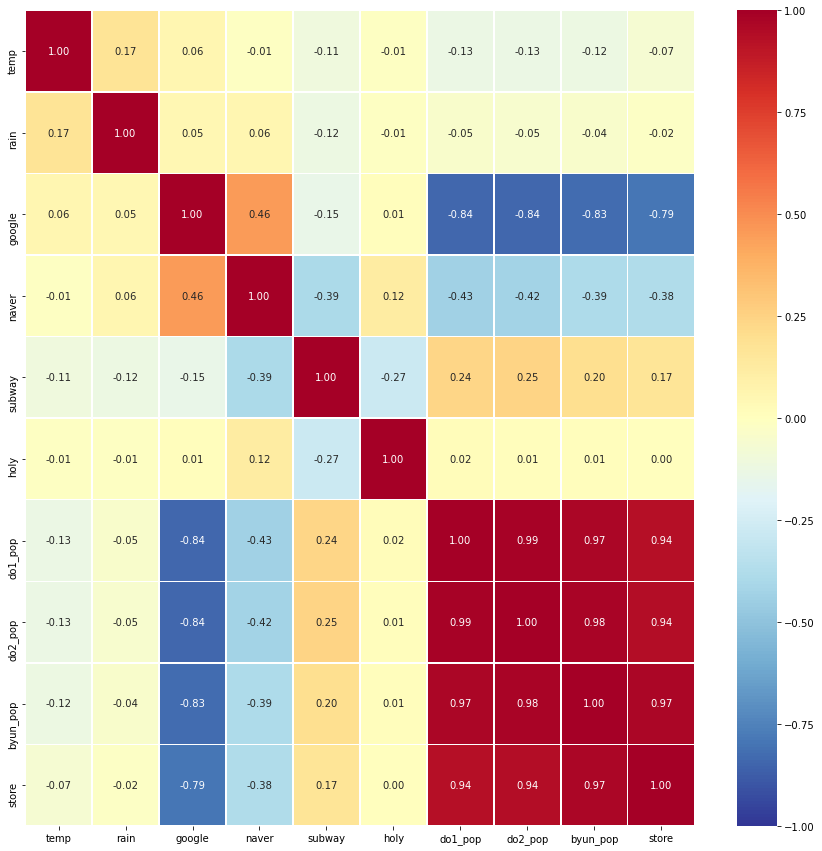

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data = X_cor.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdYlBu_r',vmin=-1,vmax=1)

In [21]:
X_train

,temp,rain,google,naver,subway,holy,vacation,do1_pop,do2_pop,byun_pop,...,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12
801,-1.232665,-0.502136,-0.049334,-0.874331,0.903906,-0.22248,0.0,0.548946,0.105571,-0.066219,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.846370,1.724104,0.963010,0.478670,-1.326573,-0.22248,0.0,-1.438669,-1.509246,-1.469638,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1223,0.964609,-0.502136,1.165479,-0.486873,0.938632,-0.22248,0.0,-0.876976,-0.914451,-0.866281,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1180,0.353708,-0.502136,0.857374,1.695379,-0.001330,-0.22248,0.0,-0.880313,-0.795753,-0.775494,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,-0.661177,-0.502136,-0.410257,0.005253,0.002672,-0.22248,0.0,1.453216,1.574298,1.573626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.255175,-0.257622,-1.079285,-1.257647,0.913198,-0.22248,0.0,0.468863,0.023395,-0.158897,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1216,0.422680,2.046195,1.015828,0.085454,0.522158,-0.22248,0.0,-0.866965,-0.905320,-0.853041,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,1.467124,-0.064109,1.860915,1.668674,-0.395424,-0.22248,1.0,-1.438669,-1.500116,-1.437484,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
559,0.767544,-0.502136,-0.744771,0.288507,-0.807011,-0.22248,0.0,0.733581,0.807325,0.556052,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X_test

,temp,rain,google,naver,subway,holy,vacation,do1_pop,do2_pop,byun_pop,...,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12
1018,-0.542938,-0.502136,0.012287,-0.202550,0.985420,-0.22248,0.0,-0.645625,-0.271394,-0.527720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,-0.010863,0.940136,-1.079285,0.005253,0.002672,-0.22248,0.0,1.488808,1.636908,1.609563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
107,-1.508556,-0.502136,-1.035270,-0.173313,0.002672,-0.22248,1.0,1.260794,1.263856,1.590649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,-0.621764,-0.502136,-0.832801,0.005253,0.002672,-0.22248,0.0,1.420960,1.511688,1.550929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1686,0.787250,1.136124,0.575678,0.088216,-1.213844,-0.22248,0.0,-1.438669,-1.509246,-1.469638,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.540919,-0.502136,-1.237739,-1.241071,0.002672,-0.22248,0.0,1.053913,1.119071,1.257762,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
578,1.151821,-0.502136,0.117923,0.838502,-1.359423,-0.22248,0.0,0.713561,0.747324,0.487962,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
170,-0.030569,2.104829,-1.008861,-0.465232,0.002672,-0.22248,0.0,1.210742,1.142550,1.429880,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1635,1.023728,-0.188556,2.028172,1.255890,-2.658534,-0.22248,1.0,-1.438669,-1.480550,-1.401548,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# na 값은 없다.
X_test.isnull().sum().sum()

0

In [24]:
# 예측값 저장 dictionary
Data = { 'y_test' : y_test }

In [25]:
# 평가값 저장 dictionary
score = {}

# Multi Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn import metrics
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test,y_pred))
print("R squared :", metrics.r2_score(y_test,y_pred))
score['linear'] =  [metrics.mean_squared_error(y_test,y_pred), model.score(X_test, y_test)]
Data['linear'] = y_pred 

MSE : 115.87375882979677
R squared : 0.5077488263894528


Text(0.5, 1.0, 'Coefficients in the Model')

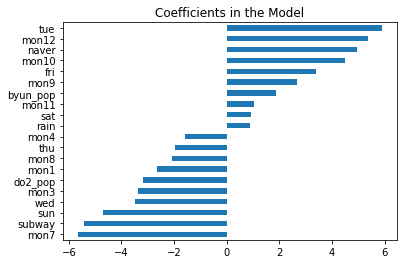

In [28]:
coef = pd.Series(model.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

# Ridge regression

$w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M w_j^2 \right) $

In [29]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

para_range = np.logspace(-3, 3, num=50) # 10^-3 ~ 10^3 
model = RidgeCV(alphas = para_range , cv=5)
# cross validaaion 을 5 fold cross validation 으로 지정 , 
# para_range 의 범위만큼 ,cv 를 해서 최적의 alpha를 구하려하였다.
model.fit(X_train, y_train) ;

In [30]:
from sklearn import metrics

predicted = model.predict(X_test) 
# 우리가 fitting 한 coefficient 로 X_test 를 이용해 Y_test 를 predict
#ridgecv.alpha_ # Estimated regularization parametor (최적값)

print('best_alpha :',model.alpha_) 
print ("MSE :", metrics.mean_squared_error(y_test, predicted))
print('R_squared :',model.score(X_test, y_test)) # C-V 로 찾은 최적의 ridge 로 계산한 R^2

best_alpha : 59.636233165946365
MSE : 115.78052629560398
R_squared : 0.5081448938411224


In [31]:
# 데이터 저장
score['Ridge'] =  [metrics.mean_squared_error(y_test, predicted),model.score(X_test, y_test)]
Data['Ridge'] = y_pred 

Text(0.5, 1.0, 'Coefficients in the Model')

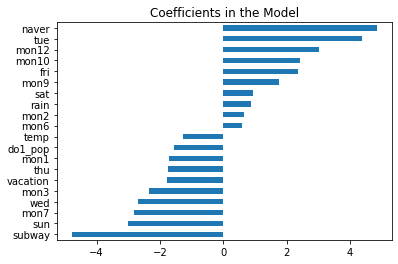

In [32]:
# 변수의 계수 시각화
coef = pd.Series(model.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

# lasso regression

$w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M | w_j | \right)$

In [34]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
alphas = np.logspace(-3, 3, num=50) # 10^-3 ~ 10^3 
lassocv = LassoCV(alphas = alphas, cv=5)
# 위 ridge 때와 동일
lassocv.fit(X_train, y_train) ;

In [35]:
from sklearn import metrics
predicted = lassocv.predict(X_test) 
#lassocv.alpha_ # Estimated regularization parametor (최적값)
print('best_alpha :',lassocv.alpha_) 
print ("MSE :", metrics.mean_squared_error(y_test, predicted))
print('R_squared :',lassocv.score(X_test, y_test)) # C-V 로 찾은 최적의 ridge 로 계산한 R^2

best_alpha : 0.0517947467923121
MSE : 114.83521939143081
R_squared : 0.5121607162128201


In [36]:
score['lasso'] = [metrics.mean_squared_error(y_test, predicted), model.score(X_test, y_test)]
Data['lasso'] = y_pred 

Text(0.5, 1.0, 'Coefficients in the Model')

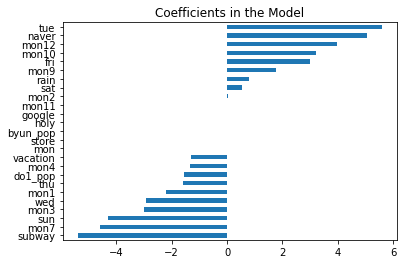

In [37]:
# 계수 시각화
coef = pd.Series(lassocv.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(15)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

# K-Neighbors Regression

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
model = KNeighborsRegressor() 
param_grid ={'n_neighbors' : np.arange(1,10)}
model = GridSearchCV(model,param_grid,cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [39]:
y_pred = model.predict(X_test)
print('best N :' ,model.best_params_)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("R squared :", metrics.r2_score(y_test, y_pred))

best N : {'n_neighbors': 9}
MSE : 110.66125635439359
R squared : 0.5298924116746597


In [40]:
score['K-NN'] =  [metrics.mean_squared_error(y_test, y_pred), model.score(X_test, y_test)]
Data['K-NN'] = y_pred 

# RandomForest Regressoion

In [41]:
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [42]:
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print('R_squared :',model.score(X_test, y_test)) 

MSE : 91.9599994117647
R_squared : 0.6093384896388988


In [43]:
score['random_forest'] =  [metrics.mean_squared_error(y_test, y_pred), model.score(X_test, y_test)]
Data['random_forest'] = y_pred 

<AxesSubplot:>

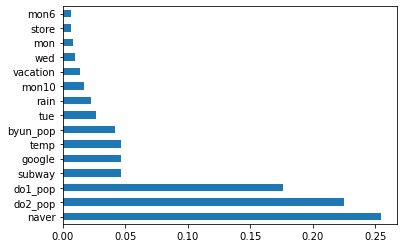

In [44]:
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Gradient Boosting resgressoion

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [46]:
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print('R_squared :',model.score(X_test, y_test)) 

MSE : 87.64051494326498
R_squared : 0.627688384563208


In [47]:
score['Gradient_boosting'] = [metrics.mean_squared_error(y_test, y_pred), model.score(X_test, y_test)]
Data['Gradient_boosting'] = y_pred 

<AxesSubplot:>

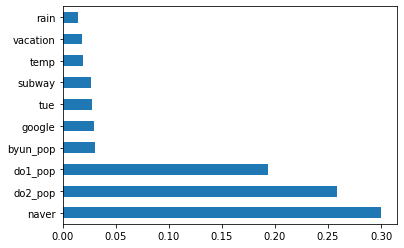

In [48]:
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(10).plot(kind='barh')

 # xgboost Regression

In [49]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
model = XGBRegressor(n_estimators = 150, learning_rate=0.08,max_depth=3,random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
from sklearn import metrics
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print('R_squared :',model.score(X_test, y_test)) 

MSE : 86.19491623165206
R_squared : 0.6338295304926034


In [51]:
score['xgb'] =  [metrics.mean_squared_error(y_test, y_pred), model.score(X_test, y_test)]
Data['xgb'] = y_pred 

<AxesSubplot:>

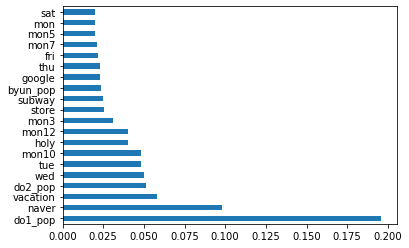

In [52]:
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')

# 비교

In [53]:
# 각 모델들의 MSE , R squre
score

{'linear': [115.87375882979677, 0.5077488263894528],
 'Ridge': [115.78052629560398, 0.5081448938411224],
 'lasso': [114.83521939143081, 0.5081448938411224],
 'K-NN': [110.66125635439359, 0.5298924116746597],
 'random_forest': [91.9599994117647, 0.6093384896388988],
 'Gradient_boosting': [87.64051494326498, 0.627688384563208],
 'xgb': [86.19491623165206, 0.6338295304926034]}

In [54]:
# 시각화 하기위해 파일저장.
pred_DATA = pd.DataFrame(Data)
pred_DATA.to_csv('예측.csv')

In [55]:
pred_DATA.head(10)

,y_test,linear,Ridge,lasso,K-NN,random_forest,Gradient_boosting,xgb
0,39,39.591610,39.591610,39.591610,47.555556,49.41,45.424855,47.355961
1,53,43.442307,43.442307,43.442307,45.666667,44.20,47.707230,48.964478
2,35,38.667962,38.667962,38.667962,34.000000,37.63,31.881639,31.860603
3,60,47.198234,47.198234,47.198234,52.888889,49.79,47.914982,48.031036
4,73,54.452415,54.452415,54.452415,67.555556,68.10,63.964419,63.798450
5,24,24.652574,24.652574,24.652574,27.888889,22.72,24.367213,24.255486
6,42,37.779270,37.779270,37.779270,40.000000,38.45,40.595756,39.900398
7,41,37.048577,37.048577,37.048577,36.111111,39.32,39.082240,39.168682
8,50,48.935753,48.935753,48.935753,49.222222,44.32,48.479283,46.267185
9,27,36.003448,36.003448,36.003448,36.888889,39.09,42.556822,40.453506


In [56]:
# 시각화는 따로 tableau 프로그램을 사용하였습니다.